# Лабораторна робота №1
## Класифікація зображень за допомогою PyTorch

**Мета роботи: Навчитись тренувати базову нейронну мережу для класифікації зображень.**

**Вимоги:**

1.   Встановлені Python та бібліотеки PyTorch, torchvision, matplotlib.
2.   Завантажений набір даних CIFAR-10.

## Завдання до лабораторної роботи (частина І): Робота з даними (CIFAR-10)

1.   Імпортуйте необхідні бібліотеки:

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, Subset, random_split
from torchvision.utils import make_grid

torch.manual_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [109]:
TRAIN_DIR = 'data/train'
TEST_DIR = 'data/test'

2.   Завантаження даних. Напишіть функцію, яка завантажує набір даних CIFAR-10.
3.   Перевірка наявності даних. Напишіть код, який перевіряє, чи дані завантажені та розпаковані успішно. Виведіть повідомлення про статус завантаження.
4.   Підготовка даних. Напишіть код, щоб імплементувати трансформації для зображень:
*    перетворення в тензори;
*    денормалізація (при необхідності).  

In [110]:
transform_train_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [111]:
data_full = torchvision.datasets.CIFAR10(root=TRAIN_DIR, train=True, transform=transform_train_data, download=True)
data_test = torchvision.datasets.CIFAR10(root=TEST_DIR, train=False, transform=transform_test_data, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [112]:
train_size = int(0.8 * len(data_full))
val_size = len(data_full) - train_size

data_train, data_val = random_split(data_full, [train_size, val_size])

In [113]:
print(f"Amount of pictures in train: {len(data_train)}")
print(f"Amount of pictures in validation: {len(data_val)}")
print(f"Amount of pictures in test: {len(data_test)}")

Amount of pictures in train: 40000
Amount of pictures in validation: 10000
Amount of pictures in test: 10000


Використайте `torchvision.transforms` для підготовки даних.

5.   Створення DataLoader. Створіть DataLoader для навчального та тестового наборів даних, щоб спростити процес завантаження даних за батчами.
6.   Візуалізація прикладів:
*   напишіть функцію для візуалізації деяких зображень з набору даних;
*   відобразіть кілька зображень з їхніми реальними мітками.

In [114]:
train_loader = DataLoader(data_train, batch_size=32, shuffle=True, num_workers=8)
validation_loader = DataLoader(data_val, batch_size=32, shuffle=False, num_workers=8)
test_loader = DataLoader(data_test, batch_size=32, shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [115]:
train_images, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_images.size()}")
print(f"Labels batch shape: {train_labels.size()}")


Feature batch shape: torch.Size([32, 3, 32, 32])
Labels batch shape: torch.Size([32])


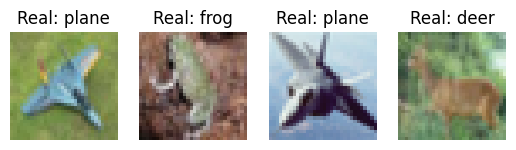

In [116]:
random_images_indices = np.random.choice(len(train_images), 4, replace=False)

for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = train_images[i] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"Real: {classes[train_labels[i]]}")
    plt.axis("off")

plt.show()

7.   Ваші висновки до частини І.

### Висновки до частини I

Було імлплементовано трансформації з перетворенням зоображень на тензори та нормалізації, потім за допомогою пакетів pytorch було викачано датасет CIRAF10. Також було створено Dataloader класи для контролю над батачами які потім будуть використовуватися для тренування. Поки число батчів було обране мною з голови, так само з Data Augmentation.

## Завдання до лабораторної роботи (частина ІІ):
0. Розділіть набір даних на навчальний і тестовий.
1. Визначення структури CNN.
    - Створіть клас для цільної нейронної мережі, яка буде містити мінімум два повнозв'язних шари.

In [117]:
class CustomCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x: torch.Tensor):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = CustomCNN()

model.to(device)

CustomCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

2. Вибір функції втрати та оптимізатора:
    - визначте функцію втрат (наприклад, CrossEntropyLoss) та оптимізатор (наприклад, SGD або Adam).

In [118]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-4)

3. Тренування моделі.
    - Реалізуйте цикл навчання, де:
        - модель тренується на навчальному наборі даних;
        - виводиться значення функції втрат та точність (на навчальній та валідаційній множинах) після кожної епохи.

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

history = {
    'epoch': [],
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': [],
}
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_labels = []
    train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)

        train_labels.extend(labels.cpu().numpy())
        train_preds.extend(predicted.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(train_labels, train_preds) * 100

    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = val_loss / len(test_loader)

    val_accuracy = accuracy_score(all_labels, all_preds) * 100
    prec = precision_score(all_labels, all_preds, average='macro')
    rec = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    history['epoch'].append(epoch)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_accuracy'].append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Test Acc: {val_accuracy:.2f}%, "
          f"Prec: {prec:.2f}, Rec: {rec:.2f}, F1: {f1:.2f}")

Epoch 1/10 - Train Loss: 1.6755, Train Acc: 38.75% | Val Loss: 1.5104, Test Acc: 45.43%, Prec: 0.47, Rec: 0.45, F1: 0.45
Epoch 2/10 - Train Loss: 1.4157, Train Acc: 48.75% | Val Loss: 1.3346, Test Acc: 52.07%, Prec: 0.52, Rec: 0.52, F1: 0.51
Epoch 3/10 - Train Loss: 1.2808, Train Acc: 53.90% | Val Loss: 1.2557, Test Acc: 55.15%, Prec: 0.55, Rec: 0.55, F1: 0.54
Epoch 4/10 - Train Loss: 1.1847, Train Acc: 58.02% | Val Loss: 1.2170, Test Acc: 56.59%, Prec: 0.59, Rec: 0.57, F1: 0.56
Epoch 5/10 - Train Loss: 1.1096, Train Acc: 60.59% | Val Loss: 1.1504, Test Acc: 59.54%, Prec: 0.60, Rec: 0.59, F1: 0.59
Epoch 6/10 - Train Loss: 1.0472, Train Acc: 63.01% | Val Loss: 1.1494, Test Acc: 59.11%, Prec: 0.60, Rec: 0.59, F1: 0.59
Epoch 7/10 - Train Loss: 0.9975, Train Acc: 64.63% | Val Loss: 1.1634, Test Acc: 58.89%, Prec: 0.61, Rec: 0.59, F1: 0.59
Epoch 8/10 - Train Loss: 0.9549, Train Acc: 66.06% | Val Loss: 1.1419, Test Acc: 60.57%, Prec: 0.61, Rec: 0.60, F1: 0.60
Epoch 9/10 - Train Loss: 0.9161,

4. Оцінка моделі:
    - визначте точність моделі на тестовому наборі даних;
    - виведіть детальні статистики (загальна точність та точність для кожного класу).

In [120]:
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())


overall_accuracy = accuracy_score(all_labels, all_preds)
print(f"Загальна точність моделі на тестовому наборі: {overall_accuracy:.2f}")

report = classification_report(all_labels, all_preds, target_names=classes)
print("Детальна статистика по класах:\n", report)

Загальна точність моделі на тестовому наборі: 0.61
Детальна статистика по класах:
               precision    recall  f1-score   support

       plane       0.65      0.66      0.66      1000
         car       0.71      0.77      0.74      1000
        bird       0.40      0.65      0.50      1000
         cat       0.43      0.42      0.42      1000
        deer       0.58      0.46      0.51      1000
         dog       0.59      0.39      0.47      1000
        frog       0.66      0.70      0.68      1000
       horse       0.66      0.68      0.67      1000
        ship       0.77      0.71      0.74      1000
       truck       0.74      0.63      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



5. Візуалізація результатів:
    - візуалізуйте кілька випадкових передбачених зображень разом з їхніми реальними мітками та передбаченнями;
    - побудуйте графік точності та втрат для навчального набору даних на кожній епосі.

In [121]:
test_images, test_labels = next(iter(test_loader))

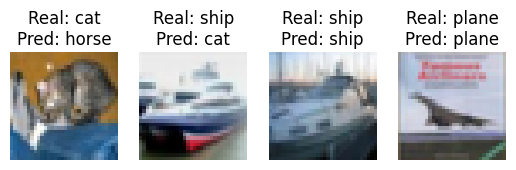

In [122]:
test_random_indices = np.random.choice(len(test_images), 4, replace=False)

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels = predicted.cpu().numpy()

for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = test_images[i] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"Real: {classes[test_labels[i]]}\nPred: {classes[predicted_labels[i]]}")
    plt.axis("off")

plt.show()

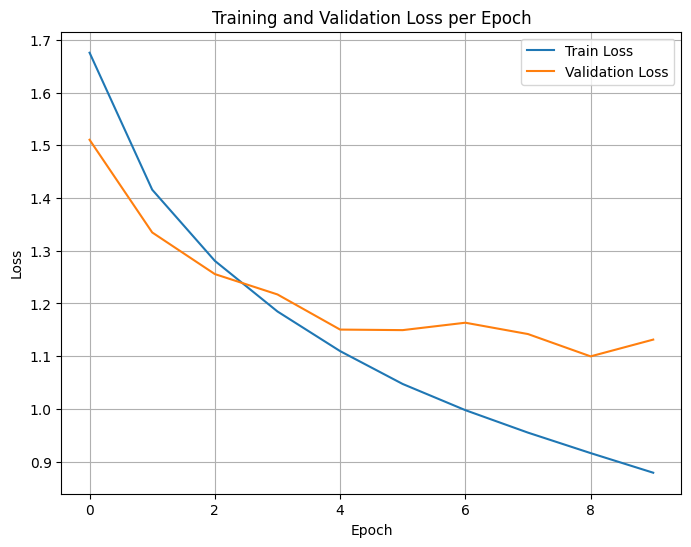

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(history['epoch'], history['train_loss'], label='Train Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

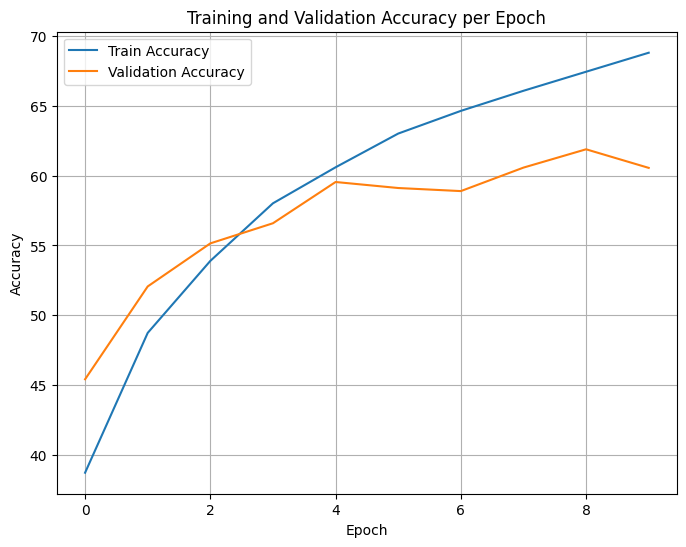

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(history['epoch'], history['train_accuracy'], label='Train Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Додаткові завдання (за бажанням):

- Дослідіть, як зміна параметрів підготовки даних (наприклад, різні трансформації) впливає на результати моделі.
- Спробуйте змінити архітектуру моделі (додати додаткові шари) та проаналізуйте, як це впливає на результати.
- Включіть регуляризацію (наприклад, Dropout) для покращення загальної точності.


In [151]:
augmenation_transform_train_data = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test_val_data = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

full_train_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=augmenation_transform_train_data
)

full_val_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=False, transform=transform_test_val_data
)

train_size = int(0.8 * len(full_train_set))
val_size = len(full_train_set) - train_size

indices = torch.randperm(len(full_train_set))
train_indices = indices[:train_size]
val_indices = indices[train_size:]

train_set = Subset(full_train_set, train_indices)
val_set = Subset(full_val_set, val_indices)

test_set = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test_val_data
)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=8)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False, num_workers=8)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers=8)

Files already downloaded and verified
Files already downloaded and verified


In [152]:
train_images, train_labels = next(iter(train_loader))

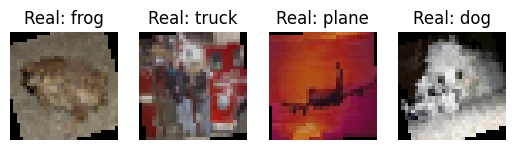

In [153]:
random_images_indices = np.random.choice(len(train_images), 4, replace=False)

for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = train_images[i] / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"Real: {classes[train_labels[i]]}")
    plt.axis("off")

plt.show()

In [154]:
model_v2 = CustomCNN()
model_v2.to(device)

CustomCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [155]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_v2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-4)

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

history = {
    'epoch': [],
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': [],
}
num_epochs = 10

for epoch in range(num_epochs):
    model_v2.train()
    running_loss = 0.0
    train_labels = []
    train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model_v2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)

        train_labels.extend(labels.cpu().numpy())
        train_preds.extend(predicted.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(train_labels, train_preds) * 100

    model_v2.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model_v2(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = val_loss / len(test_loader)

    val_accuracy = accuracy_score(all_labels, all_preds) * 100
    prec = precision_score(all_labels, all_preds, average='macro')
    rec = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    history['epoch'].append(epoch)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_accuracy'].append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Test Acc: {val_accuracy:.2f}%, "
          f"Prec: {prec:.2f}, Rec: {rec:.2f}, F1: {f1:.2f}")

Epoch 1/10 - Train Loss: 1.7208, Train Acc: 36.94% | Val Loss: 1.4424, Test Acc: 47.32%, Prec: 0.46, Rec: 0.47, F1: 0.45
Epoch 2/10 - Train Loss: 1.4682, Train Acc: 47.34% | Val Loss: 1.3088, Test Acc: 52.91%, Prec: 0.52, Rec: 0.53, F1: 0.52
Epoch 3/10 - Train Loss: 1.3622, Train Acc: 51.33% | Val Loss: 1.2421, Test Acc: 55.11%, Prec: 0.56, Rec: 0.55, F1: 0.54
Epoch 4/10 - Train Loss: 1.3067, Train Acc: 53.45% | Val Loss: 1.1711, Test Acc: 58.95%, Prec: 0.59, Rec: 0.59, F1: 0.58
Epoch 5/10 - Train Loss: 1.2551, Train Acc: 54.95% | Val Loss: 1.1049, Test Acc: 60.70%, Prec: 0.61, Rec: 0.61, F1: 0.60
Epoch 6/10 - Train Loss: 1.2181, Train Acc: 56.73% | Val Loss: 1.0865, Test Acc: 61.36%, Prec: 0.61, Rec: 0.61, F1: 0.61
Epoch 7/10 - Train Loss: 1.1854, Train Acc: 58.15% | Val Loss: 1.0643, Test Acc: 62.25%, Prec: 0.63, Rec: 0.62, F1: 0.62
Epoch 8/10 - Train Loss: 1.1673, Train Acc: 58.75% | Val Loss: 1.0290, Test Acc: 62.63%, Prec: 0.63, Rec: 0.62, F1: 0.62
Epoch 9/10 - Train Loss: 1.1459,

In [171]:
model_v2.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_v2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())


overall_accuracy = accuracy_score(all_labels, all_preds)
print(f"Загальна точність моделі на тестовому наборі: {overall_accuracy:.2f}")

report = classification_report(all_labels, all_preds, target_names=classes)
print("Детальна статистика по класах:\n", report)

Загальна точність моделі на тестовому наборі: 0.63
Детальна статистика по класах:
               precision    recall  f1-score   support

       plane       0.62      0.75      0.68      1000
         car       0.71      0.82      0.76      1000
        bird       0.54      0.49      0.51      1000
         cat       0.45      0.36      0.40      1000
        deer       0.54      0.58      0.56      1000
         dog       0.50      0.58      0.54      1000
        frog       0.64      0.75      0.69      1000
       horse       0.79      0.57      0.66      1000
        ship       0.77      0.73      0.75      1000
       truck       0.73      0.64      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000



З додаванням аугменатації точність валідаційного сету збільшилася на 2-3%

In [168]:
class CustomCNNv2(nn.Module):
    def __init__(self):
        super(CustomCNNv2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.drop1 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4   = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.drop2 = nn.Dropout(0.25)

        self.fc1   = nn.Linear(64 * 8 * 8, 512)
        self.bn_fc = nn.BatchNorm1d(512)
        self.drop_fc = nn.Dropout(0.5)
        self.fc2   = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.drop1(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.drop2(x)

        x = torch.flatten(x, 1)

        x = F.relu(self.bn_fc(self.fc1(x)))
        x = self.drop_fc(x)
        x = self.fc2(x)
        return x

model_v3 = CustomCNNv2()

model_v3.cuda()

print(model_v3)


CustomCNNv2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (bn

In [169]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_v3.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-4)

In [170]:
history = {
    'epoch': [],
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': [],
}
num_epochs = 10

for epoch in range(num_epochs):
    model_v3.train()
    running_loss = 0.0
    train_labels = []
    train_preds = []

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model_v3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)

        train_labels.extend(labels.cpu().numpy())
        train_preds.extend(predicted.cpu().numpy())

    train_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(train_labels, train_preds) * 100

    model_v3.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model_v3(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss = val_loss / len(test_loader)

    val_accuracy = accuracy_score(all_labels, all_preds) * 100
    prec = precision_score(all_labels, all_preds, average='macro')
    rec = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    history['epoch'].append(epoch)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_accuracy'].append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Test Acc: {val_accuracy:.2f}%, "
          f"Prec: {prec:.2f}, Rec: {rec:.2f}, F1: {f1:.2f}")

Epoch 1/10 - Train Loss: 1.4835, Train Acc: 46.36% | Val Loss: 1.0466, Test Acc: 62.15%, Prec: 0.63, Rec: 0.62, F1: 0.62
Epoch 2/10 - Train Loss: 1.1658, Train Acc: 58.64% | Val Loss: 0.8442, Test Acc: 69.01%, Prec: 0.71, Rec: 0.69, F1: 0.69
Epoch 3/10 - Train Loss: 1.0608, Train Acc: 62.38% | Val Loss: 0.7374, Test Acc: 73.24%, Prec: 0.73, Rec: 0.73, F1: 0.73
Epoch 4/10 - Train Loss: 0.9992, Train Acc: 64.84% | Val Loss: 0.6971, Test Acc: 75.30%, Prec: 0.75, Rec: 0.75, F1: 0.75
Epoch 5/10 - Train Loss: 0.9551, Train Acc: 66.67% | Val Loss: 0.6530, Test Acc: 76.91%, Prec: 0.77, Rec: 0.77, F1: 0.77
Epoch 6/10 - Train Loss: 0.9154, Train Acc: 68.11% | Val Loss: 0.6216, Test Acc: 78.23%, Prec: 0.78, Rec: 0.78, F1: 0.78
Epoch 7/10 - Train Loss: 0.8873, Train Acc: 69.06% | Val Loss: 0.5994, Test Acc: 79.08%, Prec: 0.79, Rec: 0.79, F1: 0.79
Epoch 8/10 - Train Loss: 0.8664, Train Acc: 69.67% | Val Loss: 0.5806, Test Acc: 79.56%, Prec: 0.79, Rec: 0.79, F1: 0.79
Epoch 9/10 - Train Loss: 0.8465,

Зміна в архітектурі дозволила ловити більше ознак що призвело до кращої точності